In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.erdos_renyi_graph(3000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2860
Number of deinfluenced nodes: 0
Number of susceptible nodes: 140
influencer {2, 131, 1801, 1547, 2448, 1168, 2068, 1563, 28, 38, 937, 2347, 2094, 1198, 1088, 1738, 1886, 2159, 886, 2426}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 201))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (3, {'Random': {2003}, 'High Degree': {2003}, 'Low Degree': {2003}}), (4, {'Random': {2003}, 'High Degree': {957}, 'Low Degree': {2003}}), (5, {'Random': {2277}, 'High Degree': {101}, 'Low Degree': {2003}}), (6, {'Random': {1951}, 'High Degree': {704}, 'Low Degree': {2003, 2277}}), (7, {'Random': {347}, 'High Degree': {86}, 'Low Degree': {2003, 2277}}), (8, {'Random': {1951}, 'High Degree': {67}, 'Low Degree': {2003, 2277}}), (9, {'Random': {1835}, 'High Degree': {46}, 'Low Degree': {2003, 2277}}), (10, {'Random': {2724}, 'High Degree': {9}, 'Low Degree': {2003, 2277, 957}}), (11, {'Random': {1426}, 'High Degree': {13}, 'Low Degree': {2003, 2277, 957}}), (12, {'Random': {304}, 'High Degree': {3}, 'Low Degree': {2003, 2277, 957}}), (13, {'Random': {610}, 'High Degree': {0}, 'Low Degree': {2003, 2277, 957}}), (14, {'Random': {861, 957}, 'High Degree': {21

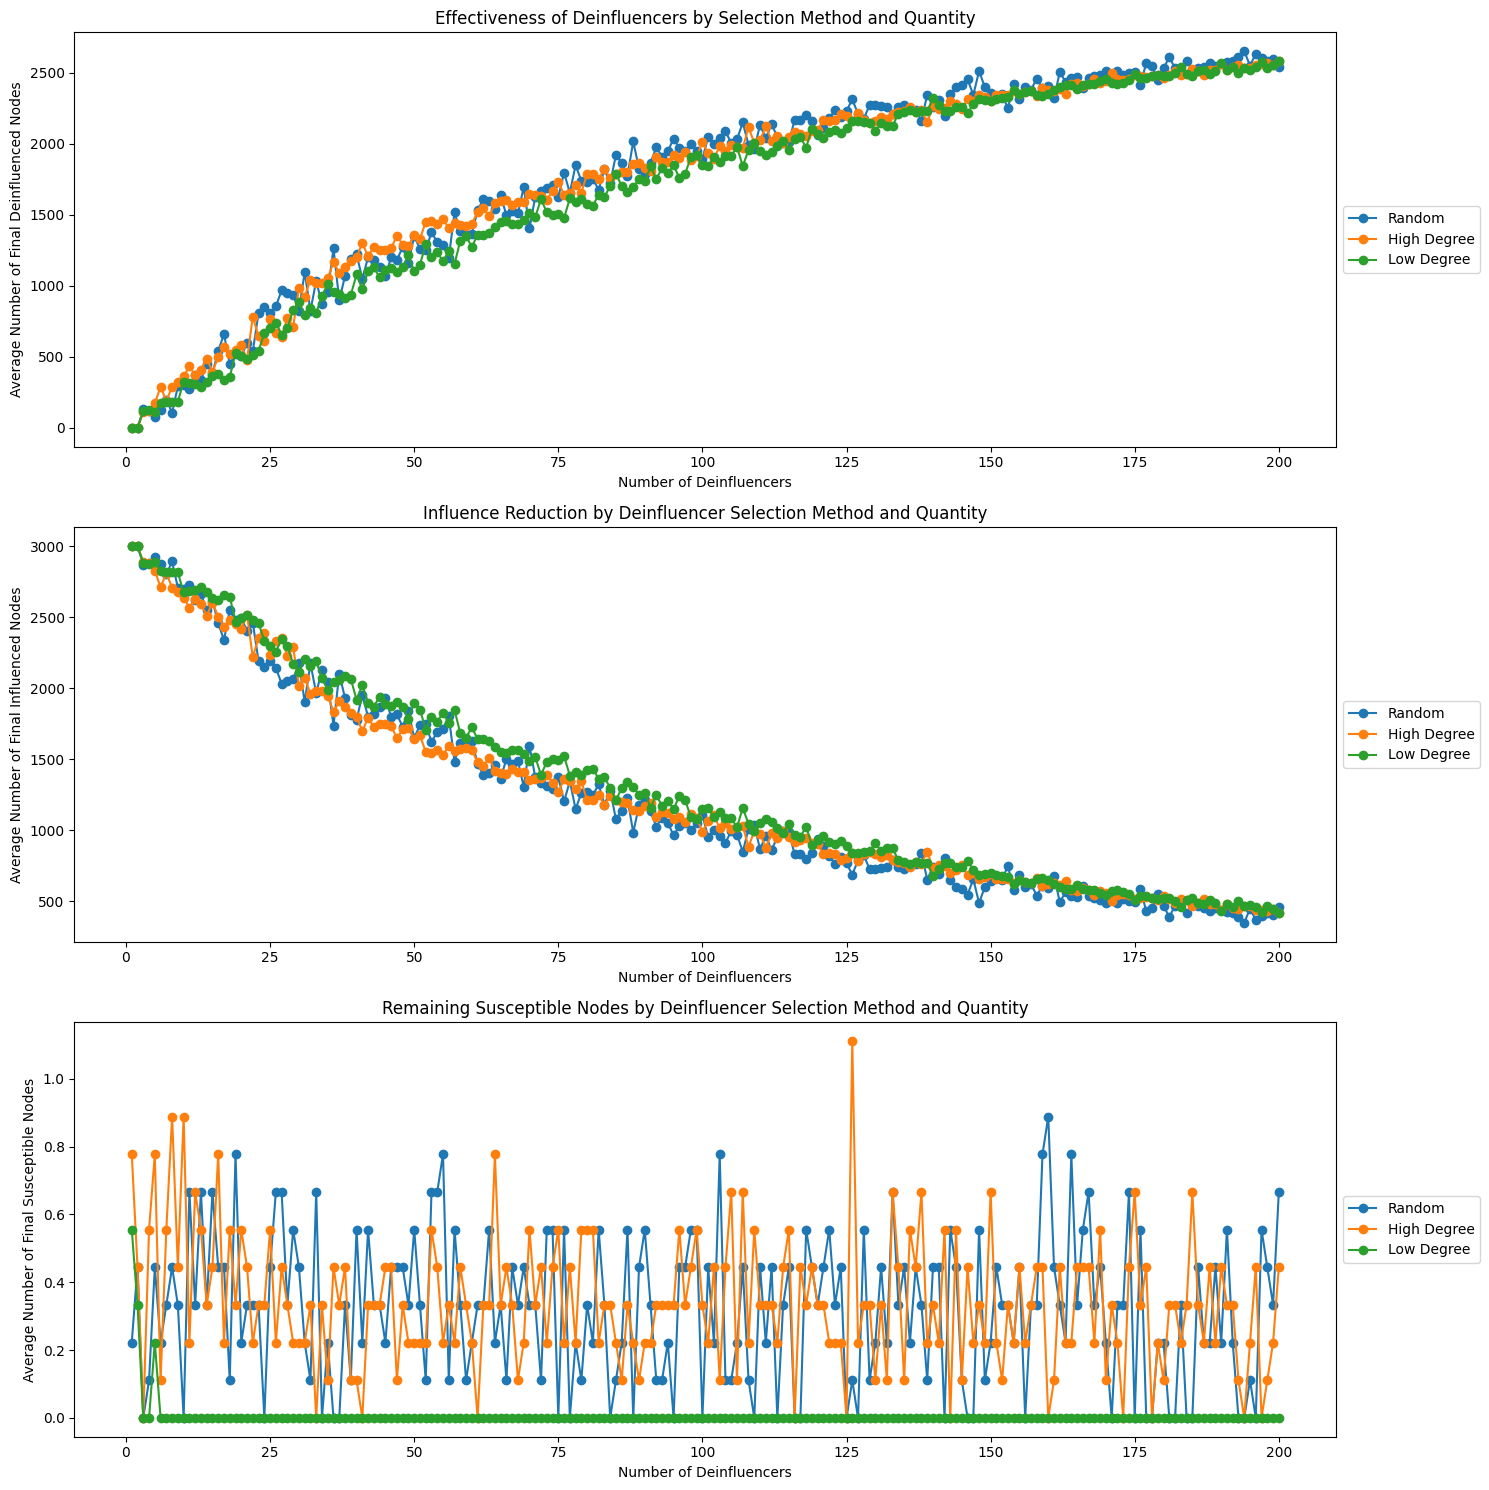

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')


plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 251))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003}}), (4, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003}}), (5, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003}}), (6, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277}}), (7, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277}}), (8, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277}}), (9, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277}}), (10, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277, 957}}), (11, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277, 957}}), (12, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277, 957}}), (13, {'Random': set(), 'High Degree': set(), 'Low Degree': {2003, 2277, 957}}), (14, {'Random': set(), 'High Degree': set(), 

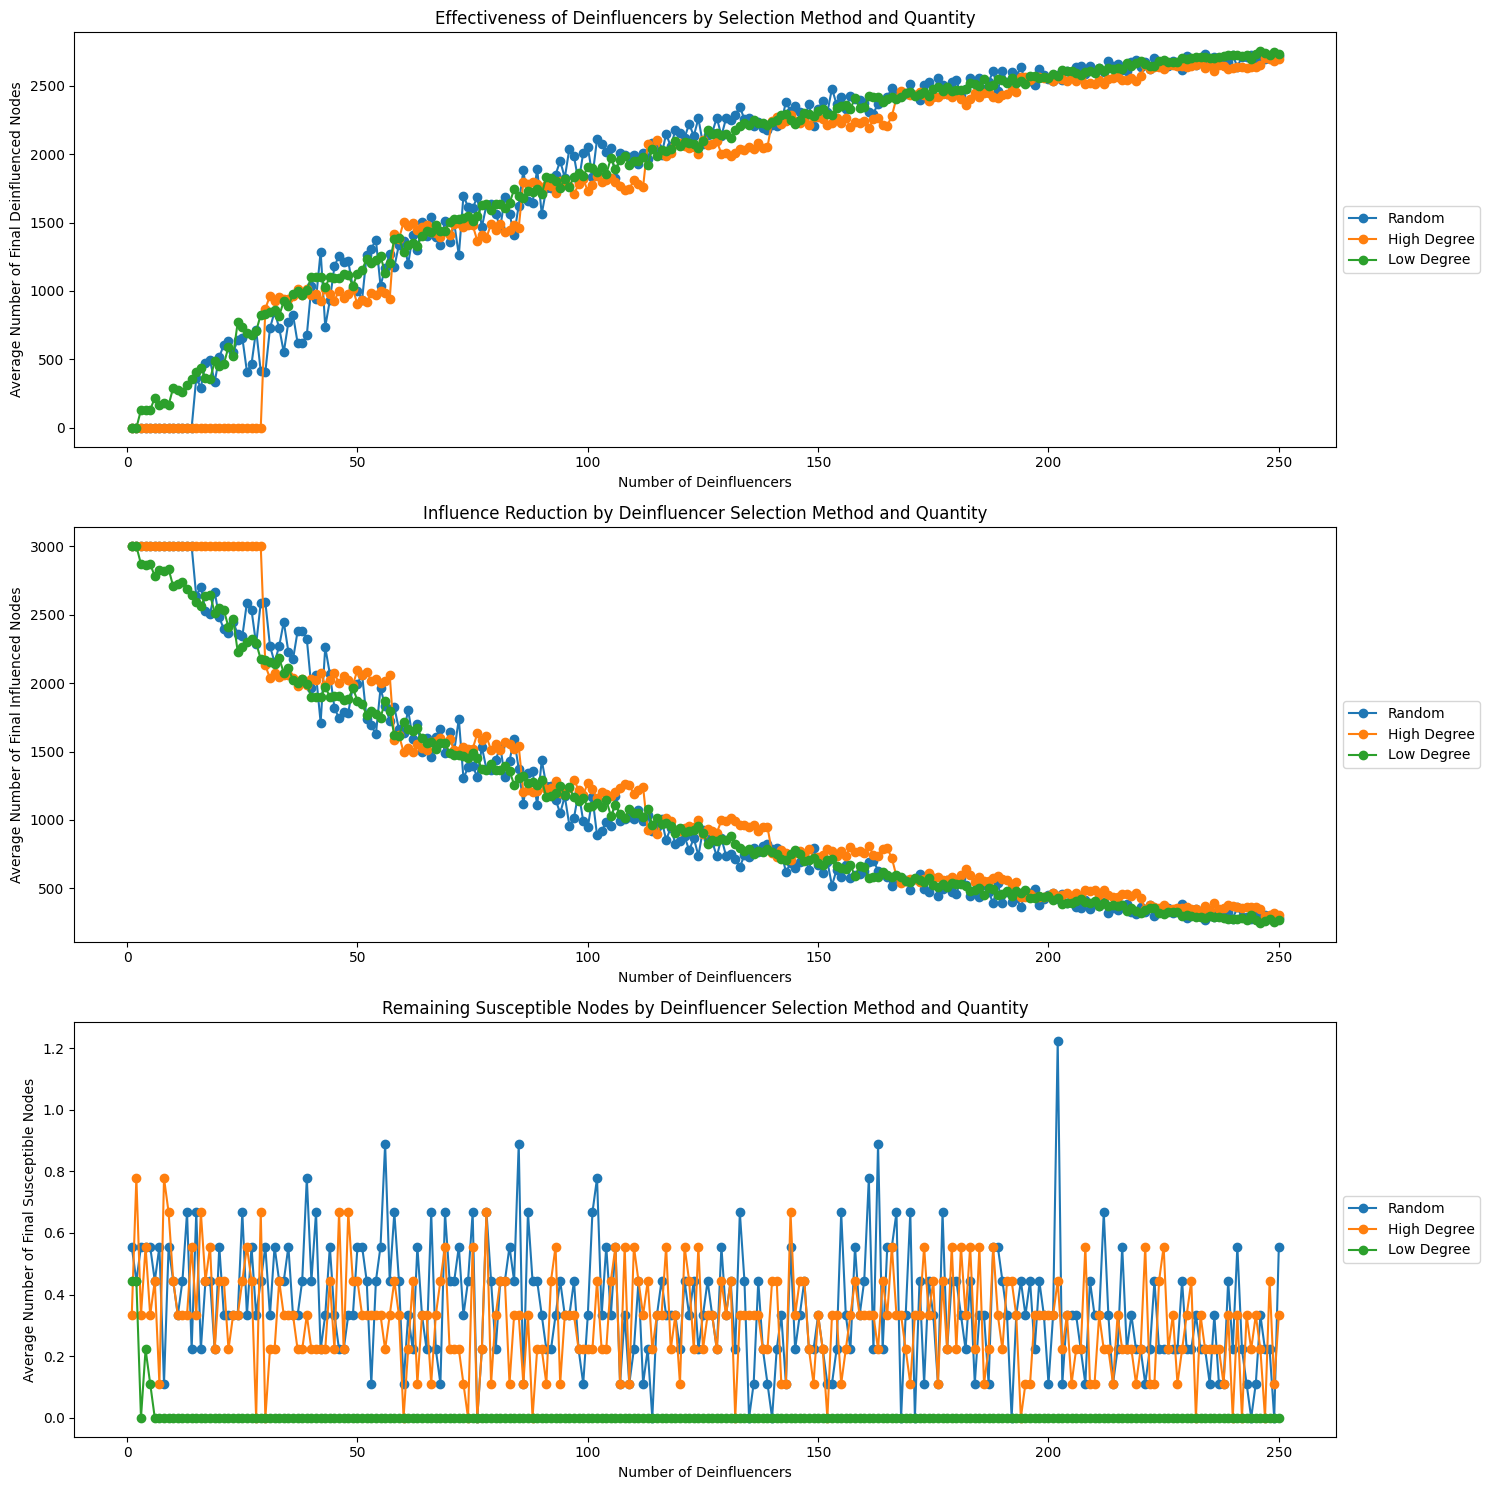

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')


plt.tight_layout()
plt.show()